# TRAINING MACHINE LEARNING MODELS TO PREDICT BREAST CANCER MALIGNANCY

## *SUMMARY*

* The purpose of this project was to develop machine learning models to distinguish between malignant and benign tumors based on the mean morphological measurements of breast cancer cells reported.
* The results showed that three of the four classification models tested showed accuracy scores >90% when confronted with test data.
* Accuracy scores may be improved by incorporating all of the features of the dataset, and not just the mean values used to the train the models in this project.
* The models could also have been improved by using cross-validation techniques to further increase accuracy by ensuring the best possible parameters were used for each ML algorithm.

## *BACKGROUND*

* Breast cancer is a disease characterized by uncontrolled cell growth in breast tissue <a href="#Ref1"><b>[1]</b></a>. It is the second most diagnosed cancer amongst women in the United States, accouunting for approximately 30% of all new female cancers per year <a href="#Ref2"><b>[2]</b></a>.
* There are several different methods used to dignoase breast cancer, one of which is fine-needle aspiration (FNA) <a href="#Ref3"><b>[3]</b></a>. During FNA, a needle is used to aspirate cells from an abnormal area or lump in the breast tissue. These aspirated cells are then sent to a lab where they are analyzed to determine whether the cells are cancerous (malignant), or non-cancerous (benign). Benign tumors are not considered to be serious in that they do not spread to nearby tissues, unlike malignant cells, which are to able to spread to other tissues and organ systems <a href="#Ref4"><b>[4]</b></a>.
* A group of researchers at the University of Wisconsin (UW) used digitized images of FNA cell samples and computed different features based on the morphology of the cell nuclei <a href="#Ref5"><b>[5]</b></a>. These cells were classified as either malignant or benign, and therefore the researchers used machine learning (ML) algorithms to train predictive models with the aim of diagnosing future cancer cells based on the morphological characteristics of their cell nuclei. 
* The purpose of this project was to train different ML classification models to distinguish between malignant and benign tumors based on the mean of the morphological measurement features reported in the original dataset by the UW researchers.   
* Improved ML models are currently being developed and refined with relatively high accuracy, and thus learning the process for training these models is crucial for early cancer detection <a href="#Ref6"><b>[6]</b></a>.

## *METHODOLOGY*

* Python language was used throughout this project, and the main libraries used were `pandas` (for data collection, wrangling and exploratory data analysis), `numpy` (for preprocessing data), `matplotlib`/`seaborn` (for generating plots), and `sci-kit learn` (for feature scaling, algorithm selection and evaluation of ML models). The `HTML` and `display` functions were imported from the `IPython.display` library to center-align some of the plots.
* The dataset was obtained from Kaggle  <a href="#Ref7"><b>[7]</b></a> and was contributed by researchers at the University of Wisconsin. The dataset includes computer-generated measurements derived from digital images of fine needle aspirated breast tissue samples that were clasified as either malignant or benign . Specifically, the cell nuclei of over 500 extracted breast tissue samples were measured and ten features were determined: these include the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. For each of the ten features, the mean, standard error and worst (described as the mean of the three largest measurements) values were reported, resulting in 30 features total. THe target variable was the diagnosis, which was classified as either malignant or benign.
* Although all thirty features are undoubtedly important, only be the mean values will be used to train the ML models in this project. This is to see whether a single summary measure type (i.e. the mean) can be used on its own to train sufficiently accurate classification models for breast cancer detection.     
* Data were prepared by removing columns with null data, and removing all features except for those reporting the mean value for each of the ten features described above. The `LabelEncoder` from the `sklearn.preprocessing` library was used to encode the malignant and benign diagnoses as numeric values: that is, one for malignant, and zero for benign.
* The dataset was then explored to detect patterns and correlations between different features. The ML classification algorithms used in this project were logisitic regression (LR), support vector machines (SVM), k-nearest neighbors (KNN), and decision tree (DT) classifiers.

## *DATA COLLECTION*

In [1]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
# Import breast cancer dataset as a pandas dataframe
df = pd.read_csv("data.csv")

In [3]:
# Find the number of rows and columns in the dataframe
df.shape

(569, 33)

In [4]:
# Display the first five rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## *DATA WRANGLING AND EDA*

In [5]:
# Display column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Display non-null values and datatypes of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Show column datatypes
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Find the sum of null values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Drop the "Unnamed: 32" column containing all null values
df.drop("Unnamed: 32", 
        axis=1, 
        inplace=True)

In [10]:
# Confirm that dataframe now contains one less column
df.shape

(569, 32)

In [11]:
# Shows descriptive statistics of dataframe and verify that dropped column is not present
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

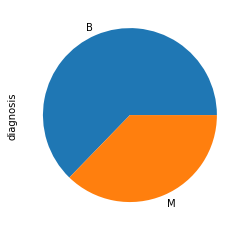

In [12]:
# Show number of malignant (M) and benign (B) values in diagnosis target feature
# Display as pie chart

print(df["diagnosis"].value_counts())

df["diagnosis"].value_counts().plot(kind="pie")

In [13]:
# Create new dataframe object containing only the target feature and the mean value features
bc_df = df[["diagnosis",
          "radius_mean",
          "texture_mean",
          "perimeter_mean",
          "area_mean", 
          "smoothness_mean",
          "compactness_mean",
          "concavity_mean",
          "concave points_mean",
          "symmetry_mean",
          "fractal_dimension_mean"]]

# Display first five rows of new dataframe
bc_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [14]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Create label encoder object and encode target labels as 0 and 1
le = LabelEncoder()
bc_df.loc[:,"diagnosis"] = le.fit_transform(bc_df.loc[:,"diagnosis"].values)

# Display first five rows or new dataframe
bc_df.head()

C:\Users\chami\AppData\Local\Temp\ipykernel_109148\1030735846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_df.loc[:,"diagnosis"] = le.fit_transform(bc_df.loc[:,"diagnosis"].values)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


0    357
1    212
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

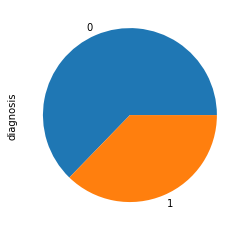

In [15]:
# Verify that value counts are unchanged 
print(bc_df["diagnosis"].value_counts())
bc_df["diagnosis"].value_counts().plot(kind="pie")

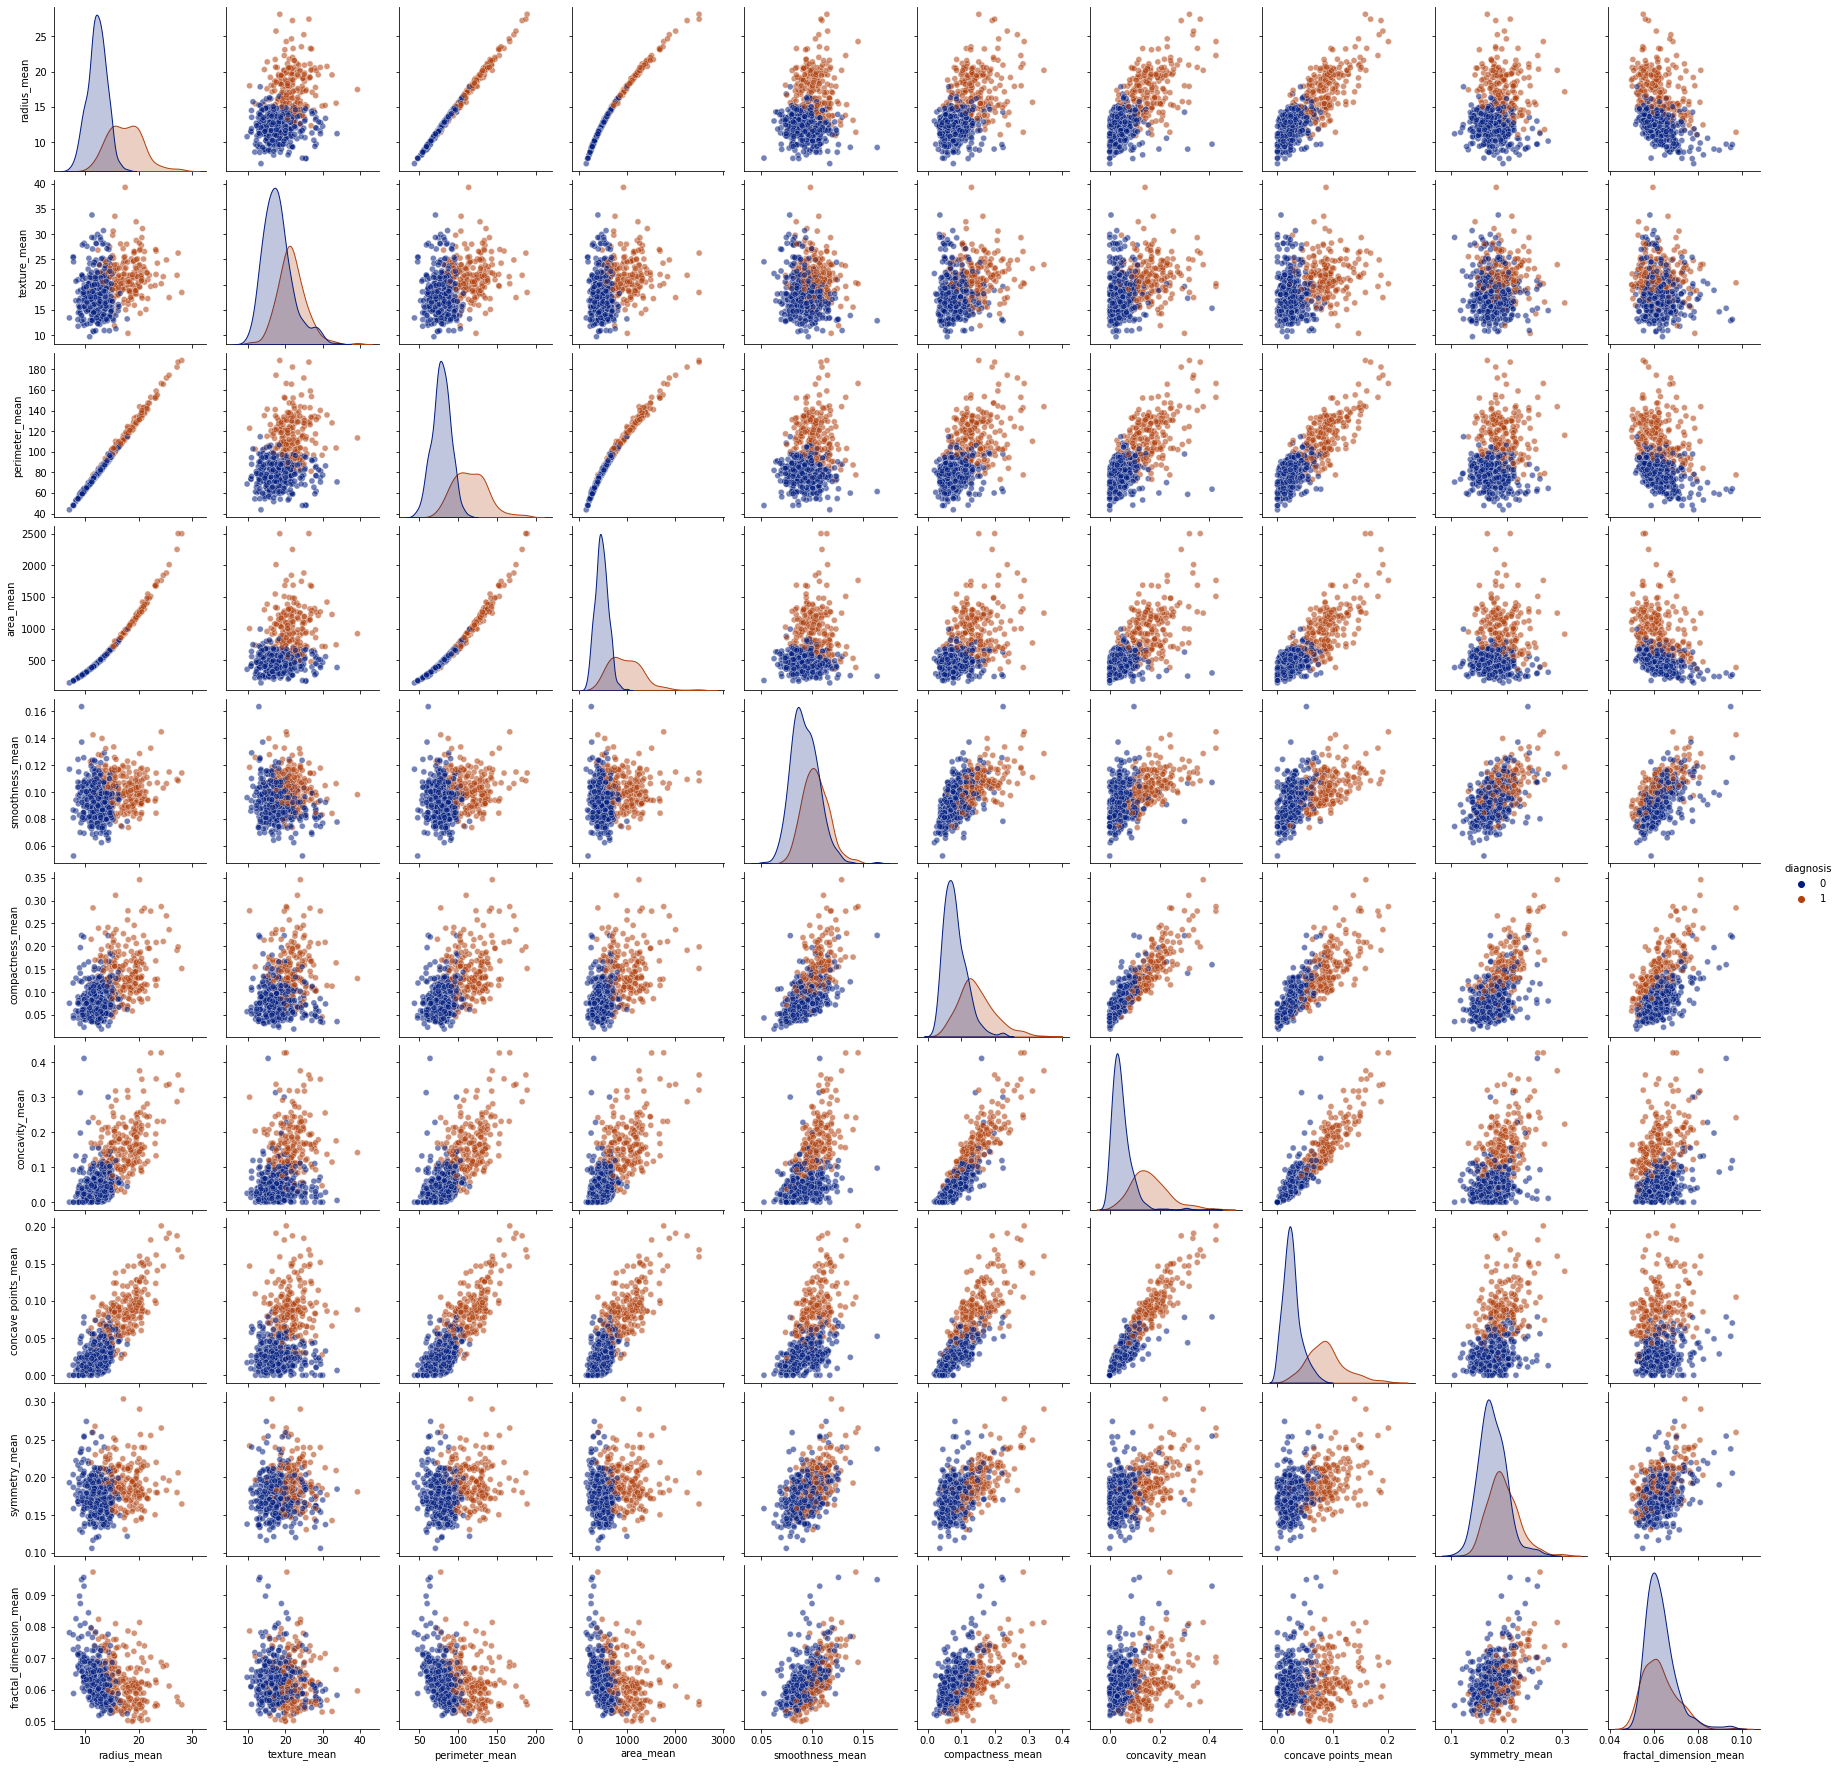

In [16]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create pairplot of all ten mean features
sns.pairplot(bc_df, 
             hue="diagnosis",
             palette="dark",
             plot_kws=dict(alpha=0.55))

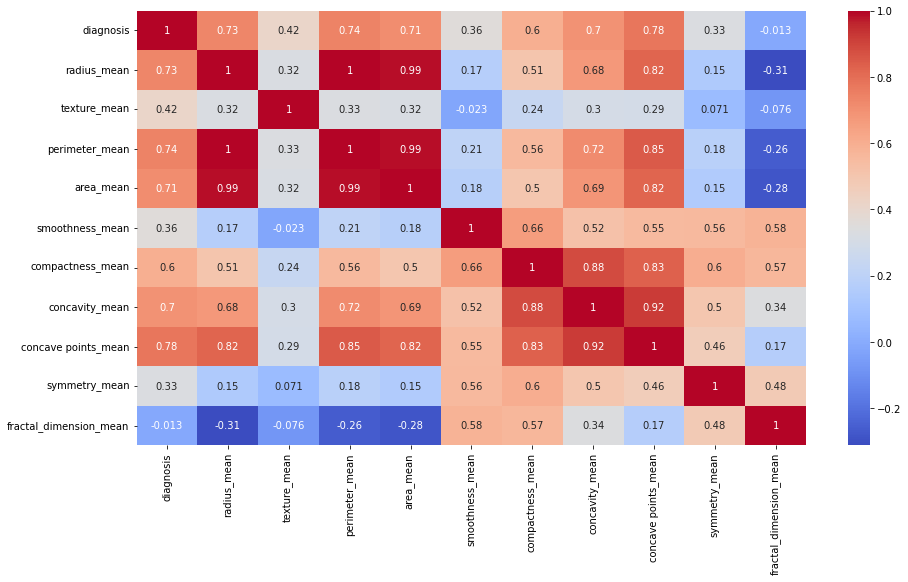

In [17]:
# Create correlation matrix object
bc_dfcorr = bc_df.corr()

# Create figure object
plt.figure(figsize=(15,8))

# Create heatmap using correlation matrix as input data
sns.heatmap(bc_dfcorr, 
            annot=True, 
            cmap="coolwarm")

# Show figure
plt.show()

In [18]:
# Create new dataframe with features that do not have high corrleation with one another
ml_df = bc_df[["diagnosis",
               "texture_mean",
               "area_mean",
               "smoothness_mean",
               "compactness_mean",
               "concavity_mean",
               "concave points_mean",
               "symmetry_mean",
               "fractal_dimension_mean"                          
               ]]

In [19]:
# Create predictor variable numpy array
X = ml_df.drop(["diagnosis"], axis=1).to_numpy()

# Create target variable numpy array
y = ml_df["diagnosis"].to_numpy() 

In [20]:
# Show first five records in predictor array
X[0:5]

array([[1.038e+01, 1.001e+03, 1.184e-01, 2.776e-01, 3.001e-01, 1.471e-01,
        2.419e-01, 7.871e-02],
       [1.777e+01, 1.326e+03, 8.474e-02, 7.864e-02, 8.690e-02, 7.017e-02,
        1.812e-01, 5.667e-02],
       [2.125e+01, 1.203e+03, 1.096e-01, 1.599e-01, 1.974e-01, 1.279e-01,
        2.069e-01, 5.999e-02],
       [2.038e+01, 3.861e+02, 1.425e-01, 2.839e-01, 2.414e-01, 1.052e-01,
        2.597e-01, 9.744e-02],
       [1.434e+01, 1.297e+03, 1.003e-01, 1.328e-01, 1.980e-01, 1.043e-01,
        1.809e-01, 5.883e-02]])

In [21]:
# Show first five records in target array
y[0:5]

array([1, 1, 1, 1, 1])

## *RESULTS*

In [22]:
# Import preprocessing libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import ML classifiers from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Import model evaluation metrics from sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
# Split data into training (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the shape of the training and testing datasets
print("The shape of the training data: {} {}".format(X_train.shape, y_train.shape))
print("The shape of the testing data: {} {}".format(X_test.shape, y_test.shape))

The shape of the training data: (455, 8) (455,)
The shape of the testing data: (114, 8) (114,)


In [24]:
# Create standard scaler object and apply to training and testing sets of predictor data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

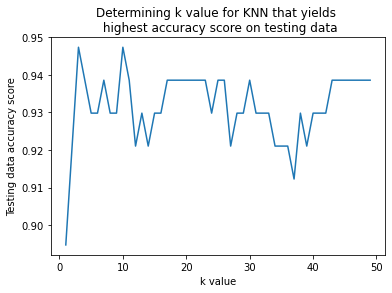

In [25]:
# Import display and HTML functions to center output graph
from IPython.display import display, HTML

# Create a list of k-values and an empty 'scores' list
k_values = range(1,50)
scores = []

# Iterate through values in 'k_values' list and use each value as n_neighbors parameter in KNN algorithm
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    
    # Make prediction using each value then append the score to the 'scores' list
    y_pred_knn = knn.predict(X_test_sc)
    scores.append(accuracy_score(y_pred_knn, y_test))

# Align all outputs to the center
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))    

# Plot k-values vs scores and change x-label, y-label, and title
plt.plot(k_values, scores)
plt.xlabel("k value")
plt.ylabel("Testing data accuracy score")
plt.title("Determining k value for KNN that yields \n highest accuracy score on testing data")

# Show the plot
plt.show()

In [26]:
# Import math module
import math

# Show starting point k-value based on square root of sample size
print("Starting point for k value (sqrt of sample size): {:.0f}".format(math.sqrt(df.shape[0])))

# Show maximum KNN accuracy score from 'scores' list
print("Maximum KNN accuracy score on testing data: {:.3f}".format(max(scores)))

# Calculate list of k-values with highest accuracy scores by adding 1 to the index value
k_value = [i+1 for i,x in enumerate(scores) if x==max(scores)]

# Show the k-values yielding the max accuracy score
print("K-values yielding highest accuracy score: {}".format(k_value))

Starting point for k value (sqrt of sample size): 24
Maximum KNN accuracy score on testing data: 0.947
K-values yielding highest accuracy score: [3, 10]


In [27]:
# Create ML classification algorithm objects
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10)
dt = DecisionTreeClassifier(random_state=1)

# Fit training data to ML objects
lr.fit(X_train_sc, y_train)
svm.fit(X_train_sc, y_train)
knn.fit(X_train_sc, y_train)
dt.fit(X_train_sc, y_train)

# Use fitted ML objects to make predictions
y_pred_lr = lr.predict(X_test_sc)
y_pred_svm = svm.predict(X_test_sc)
y_pred_knn = knn.predict(X_test_sc)
y_pred_dt = dt.predict(X_test_sc)

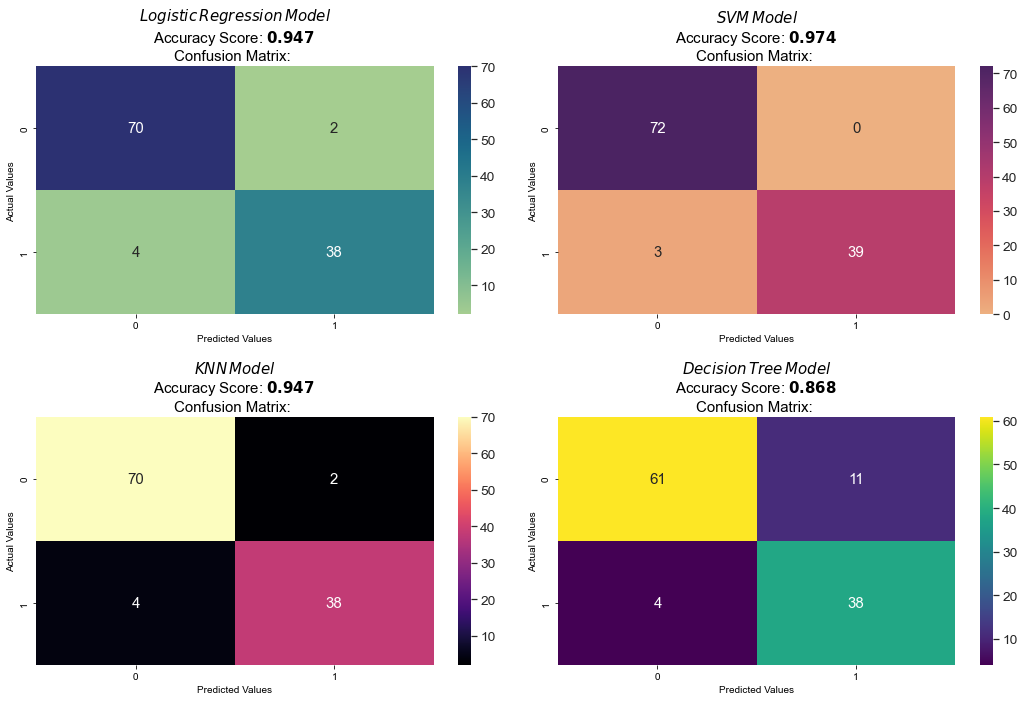

In [28]:
# Calculate confusion matrices using target variable test data and predicted data
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate accuracy scores using target variable test data and predicted data
acc_lr = accuracy_score(y_pred_lr, y_test)
acc_svm = accuracy_score(y_pred_svm, y_test)
acc_knn = accuracy_score(y_pred_knn, y_test)
acc_dt = accuracy_score(y_pred_dt, y_test)

# Generate 2x2 confusion matrices and display accuracy scores 
fig, axs = plt.subplots(2,2,
                        figsize=(15,10))

# LR model confusion matrix and accuracy score
sns.set_theme(font_scale=1.25)

axs[0,0] = sns.heatmap(cm_lr, 
                       annot=True,
                       cmap="crest",
                       ax=axs[0,0])

axs[0,0].set(xlabel="Predicted Values",
             ylabel="Actual Values",
             title=r"$\mathit{{Logistic\/Regression\/Model}}$"" \n"
            r"Accuracy Score: $\bf{{{:.3f}}}$"" \n"
            "Confusion Matrix: ".format(acc_lr))
       
# SVM model confusion matrix and accuracy score
sns.set_theme(font_scale=1.25)

axs[0,1] = sns.heatmap(cm_svm, 
                  annot=True, 
                  cmap="flare",
                 ax=axs[0,1]
                 )

axs[0,1].set(xlabel="Predicted Values",
             ylabel="Actual Values",
             title=r"$\mathit{{SVM\/Model}}$"" \n"
        r"Accuracy Score: $\bf{{{:.3f}}}$"" \n"
            "Confusion Matrix: ".format(acc_svm))
       
# KNN model confusion matrix and accuracy score
sns.set_theme(font_scale=1.25)    

axs[1,0] = sns.heatmap(cm_knn, 
                       annot=True, 
                       cmap="magma",
                       ax=axs[1,0]
                 )

axs[1,0].set(xlabel="Predicted Values",
             ylabel="Actual Values",
             title=r"$\mathit{{KNN\/Model}}$"" \n"
        r"Accuracy Score: $\bf{{{:.3f}}}$"" \n"
            "Confusion Matrix: ".format(acc_knn))

# DT model confusion matrix and accuracy score
sns.set_theme(font_scale=1.25)

axs[1,1] = sns.heatmap(cm_dt, 
                       annot=True, 
                       cmap="viridis",
                       ax=axs[1,1]
                 )

axs[1,1].set(xlabel="Predicted Values",
             ylabel="Actual Values",
             title=r"$\mathit{{Decision\/Tree\/Model}}$"" \n"
        r"Accuracy Score: $\bf{{{:.3f}}}$"" \n"
            "Confusion Matrix: ".format(acc_dt))

# Create tight layout and show figure
plt.tight_layout()
plt.show()

In [29]:
# Import classification report module from sklearn library
from sklearn.metrics import classification_report

# Show all four classification reports for each model
print("\033[1m"+"Classification Report for Logisitic Regression Model:"+"\033[0m""\n\n",
      classification_report(y_test, y_pred_lr))
print("\033[1m"+"Classification Report for SVM Model:"+"\033[0m""\n\n",
      classification_report(y_test, y_pred_svm))
print("\033[1m"+"Classification Report for KNN Model:"+"\033[0m""\n\n",
      classification_report(y_test, y_pred_knn))
print("\033[1m"+"Classification Report for Decision Tree Model:"+"\033[0m""\n\n",
      classification_report(y_test, y_pred_dt))

Classification Report for Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report for SVM Model:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification Report for KNN Model:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95     

In [30]:
# Create list of each model's accuracy scores
acc_scores = [acc_lr,
              acc_svm,
              acc_knn,
              acc_dt]

# Calulcate standard deviation of 'acc_scores'
std_dev = np.std(acc_scores, dtype=np.float64)

# Show the average accuracy score and standard error
print(u"The average accuracy score of all four classification models tested: {:.3} \u00B1 {:.1}".format(np.average(acc_scores),
                                                                                                        std_dev/np.sqrt(len(acc_scores))))

The average accuracy score of all four classification models tested: 0.934 ± 0.02


## *DISCUSSION*

* For this study, the mean values of the ten reported features were used in order to determine whether a single statistic, such as the mean, could be used to train a sufficiently accurate ML model to predict breast cancer malignancy. The accuracy metrics recorded above indicate that this was indeed possible. However, it's possible that reducing the dimensionality of the training dataset by removing features may have decreased the overall accuracy of the models. Therefore, to obtain the highest posible accuracy scores, all 30 features, which include the standard deviation and worst values, should be used to train the models. 

* The 2-D pairplot showed that there was significant overlap between the target outcomes, malignant and benign, for the texture, smoothness, symmetry and fractal dimension features, and less overlap for radius, perimeter, area, concavity, concave points. 

* The heatmap of the feature correlation matrix showed that the perimeter, area, and radius features all had significant correlation to one another (&ge;0.99). This is unsurprising, given that when calculating the parameters of a circlular entity, the area and perimeter (i.e. circumference) are both functions of the radius, and thus mathematically related. For this reason, only the area was included during feature selection. 

* For training the KNN model, the k-value was chosen based on the plot of testing data accuracy scores versus a range of k-values from 1-50. The square root of the sample size (~24) was also considered as a starting point for determining the optimal k-value. The goal was to try to avoid a lower k-value in order to build a model that generalizes well when encountering new data. However, a high k-value was also avoided to prevent underfitting on the training data. Therefore, a value of 10 was chosen as the k-value, which also yielded the highest accuracy score on the testing data. 

* The average accuracy score of the classification models was calculated to be 0.934 &#177; 0.02, and the weighted average F1-scores were between 0.87-0.93. The SVM model performed the best with an accuracy score of 0.974, followed by the LR and KNN models, which had accuracy scores of 0.947. The DT model performed worse by comparison with the other three, with an accuracy score of 0.868. Based on these findings, the SVM model would be the best option for predicting breast cancer diagnoses using mean measurement values of the features tested, although, given that two of the other models, LR and KNN, performed similarly with only minor differences in accuracy metrics, all four models should be re-trained and re-evaluated if new data becomes available.  

* A better method for determining the optimal k-value to use in the KNN model would have been to use k-fold cross-validation. By splitting the dataset into 10 parts (or folds), the model could have been trained and validated using the entire dataset to find the best value for k. However, the downside to this method is that additional computing time and resources would be required to accomplish the task. In addition, to determine the best parameters for each of the models used, the `gridsearchcv()` method could have been used, to test a range of values for each parameter, and return the parameters that resulted in the most accurate models.  

## *CONCLUSION*

* Based on the training data used here, the SVM model would be the best option for predicting breast cancer malignancy. 
* Three out of four of the ML models performed very well using just the mean value features, although the accuracy scores may have been increased further by incorporating all of the dataset's features. 
* To optimize the parameters of the each of the algorithms used to train the models, k-fold cross-validation and the `gridsearchcv()` method from `scikit-learn` could be used to train future models.

## *REFERENCES*

1. <a id="Ref1" href=https://www.cdc.gov/cancer/breast/index.htm>https://www.cdc.gov/cancer/breast/index.htm</a>

2. <a id="Ref2" href=https://www.cancer.org/cancer/breast-cancer.html>https://www.cancer.org/cancer/breast-cancer.html</a>

3. <a id="Ref3" href=https://cancer.ca/en/treatments/tests-and-procedures/fine-needle-aspiration-fna>https://cancer.ca/en/treatments/tests-and-procedures/fine-needle-aspiration-fna</a>

4. <a id="Ref4" href=https://jamanetwork.com/journals/jamaoncology/fullarticle/2768634>https://jamanetwork.com/journals/jamaoncology/fullarticle/2768634</a>

5. <a id="Ref5" href=https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29>https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29</a>

6. <a id="Ref6" href=https://www.cancer.gov/news-events/cancer-currents-blog/2022/artificial-intelligence-cancer-imaging#:~:textScientists%20have%20developed%20AI%20tools,this%20area%20is%20quickly%20evolving>https://www.cancer.gov/news-events/cancer-currents-blog/2022/artificial-intelligence-cancer-imaging#:~:text=Scientists%20have%20developed%20AI%20tools,this%20area%20is%20quickly%20evolving</a>

7. <a id="Ref7" href=https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data>https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data</a>